In [1]:
import os
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

# Configure Polars 
cfg = pl.Config()
cfg.set_tbl_rows(2000)

polars.config.Config

In [2]:
df = pl.read_excel('data/in/The Internet Movie Script Dataset .xlsx')
df.head()

shape: (5, 6)
┌───────┬────────────┬────────────────────┬───────────────────┬────────────────┬───────────────────┐
│ Sr.No ┆ Movie      ┆ Writers            ┆ Genre             ┆ Date           ┆ Sript             │
│ ---   ┆ ---        ┆ ---                ┆ ---               ┆ ---            ┆ ---               │
│ i64   ┆ str        ┆ str                ┆ str               ┆ str            ┆ str               │
╞═══════╪════════════╪════════════════════╪═══════════════════╪════════════════╪═══════════════════╡
│ 1     ┆ 9          ┆ Pamela             ┆ Animation,Adventu ┆ September_2009 ┆ ,SEQ.,05,-,PROLOG │
│       ┆            ┆ Pettler,Shane      ┆ re,Drama,Fant…    ┆                ┆ UE
               │
│       ┆            ┆ Acker              ┆                   ┆                ┆ ,,,,,
            │
│       ┆            ┆                    ┆                   ┆                ┆ ,,…               │
│ 2     ┆ A Scanner  ┆ Charlie Kaufman    ┆ Animation,Crime,D ┆ July_2006      ┆ SHOT,OF,NOTEBOOK, │
│       ┆ Darkly     ┆                    ┆ rama              ┆                ┆ PAGE,DAPPLED,…    │
│ 3     ┆ Aladdin    ┆ Roger Allers,Ron   ┆ Animation,Family, ┆ December_1992  ┆ PEDDLER:,,Oh,I,co │
│       ┆            ┆ Clements           ┆ Musical,Fanta…    ┆                ┆ me,from,a,lan…    │
│ 4     ┆ Anastasia  ┆ Susan              ┆ Family,Animation, ┆ December_1997  ┆ FADE,IN:
         │
│       ┆            ┆ Gauthier,Bruce     ┆ Musical           ┆                ┆ 
                 │
│       ┆            ┆ Graham             ┆                   ┆                ┆ on,a,well-worn,PH │
│       ┆            ┆                    ┆                   ┆                ┆ O…                │
│ 5     ┆ Antz       ┆ Todd Alcott,Chris  ┆ Adventure,Animati ┆ null           ┆ Z,(O.S.)
         │
│       ┆            ┆ Weitz,Paul W…      ┆ on,Comedy,Fan…    ┆                ┆ ,,,,,,,,,,,(over, │
│       ┆            ┆                    ┆                   ┆                ┆ a,d…              │
└───────┴────────────┴────────────────────┴───────────────────┴────────────────┴───────────────────┘

In [3]:
df = df.rename({"Sript": "script"})
print(df.shape)
print(df["Movie"].n_unique())

(60, 6)
59


In [4]:
dupd = df.filter(df["Movie"].is_duplicated())
dupd

shape: (2, 6)
┌───────┬────────────────────┬────────────────────┬───────────────────┬─────────────┬──────────────┐
│ Sr.No ┆ Movie              ┆ Writers            ┆ Genre             ┆ Date        ┆ script       │
│ ---   ┆ ---                ┆ ---                ┆ ---               ┆ ---         ┆ ---          │
│ i64   ┆ str                ┆ str                ┆ str               ┆ str         ┆ str          │
╞═══════╪════════════════════╪════════════════════╪═══════════════════╪═════════════╪══════════════╡
│ 28    ┆ Nightmare Before   ┆ Tim Burton,Michael ┆ Animation,Comedy, ┆ August_1991 ┆ NARRATOR
    │
│       ┆ Christmas The      ┆ McDowell           ┆ Fantasy,Horro…    ┆             ┆ 'Twas a long │
│       ┆                    ┆                    ┆                   ┆             ┆ time ag…     │
│ 29    ┆ Nightmare Before   ┆ Caroline Thompson  ┆ Animation,Comedy, ┆ August_1991 ┆ NARRATOR
    │
│       ┆ Christmas The      ┆                    ┆ Fantasy,Horro…    ┆             ┆ 'Twas a long │
│       ┆                    ┆                    ┆                   ┆             ┆ time ag…     │
└───────┴────────────────────┴────────────────────┴───────────────────┴─────────────┴──────────────┘

In [5]:
dupd["script"][0] == dupd["script"][1]

True

In [6]:
dupd["Genre"][0] == dupd["Genre"][1]

True

In [7]:
df[27, "Writers"] = df[27, "Writers"] + ',' + df[28, "Writers"]

df = df.filter(
    pl.col("Sr.No")!=29
)

print(df.shape)
print(df["Movie"].n_unique())

(59, 6)
59


In [8]:
print(df[0, "script"][:350])

,SEQ.,05,-,PROLOGUE
,,,,,
,,,,,,The,Focus,Features,logo,appears,on,screen,and,we,slide,INTO
,,,,,the,"O",in,Focus.
,,,,,
,,,,,Stock,dissolves,from,35mm,to,16mm.,,,,BLACK,&,WHITE.,,GRAINY,
,,,,,like,OLD,DOCUMENTARY,FOOTAGE.
,,,,,
,,,,,,,,,,,,,,,,,SCIENTIST'S,VOICE
,,,,,,,,,,,,Experiment,208,day,20...
,,,,,
,,,,,
,,,,,INT.,SCIENTIST'S,LAB


<Axes: xlabel='fraction_commas', ylabel='Count'>

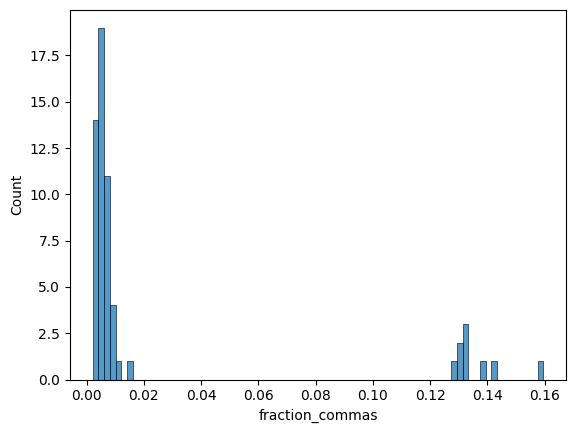

In [9]:
df = df.with_columns(
    comma_count = pl.col("script").str.count_matches(r'[,]+'),
    script_length = pl.col("script").str.len_chars()
).with_columns(
    fraction_commas = pl.col("comma_count")/pl.col("script_length")
)

sns.histplot(
    df,
    x="fraction_commas"
)

In [10]:

df = df.with_columns(
    script_clean = pl.when(
        pl.col("fraction_commas") > 0.1
    ).then(
        pl.col("script").str.replace_all(r'[,]+', " ")
    ).otherwise(pl.col("script"))
)

In [11]:
print(df[0, "script_clean"][:350])

 SEQ. 05 - PROLOGUE
 
 The Focus Features logo appears on screen and we slide INTO
 the "O" in Focus.
 
 Stock dissolves from 35mm to 16mm. BLACK & WHITE. GRAINY 
 like OLD DOCUMENTARY FOOTAGE.
 
 SCIENTIST'S VOICE
 Experiment 208 day 20...
 
 
 INT. SCIENTIST'S LAB - DAY

 We see an early incarnation of a MACHINE (this will be the
 


In [12]:
df["Genre"].str.replace_all(r'[\s]', '')\
    .str.replace_all(r'[,]+', ',')\
    .str.split(",").explode().value_counts()\
    .sort(pl.col("count"), descending=True)

shape: (14, 2)
┌───────────┬───────┐
│ Genre     ┆ count │
│ ---       ┆ ---   │
│ str       ┆ u32   │
╞═══════════╪═══════╡
│ Animation ┆ 41    │
│ Adventure ┆ 35    │
│ Comedy    ┆ 31    │
│ Action    ┆ 24    │
│ Family    ┆ 20    │
│ Drama     ┆ 15    │
│ Fantasy   ┆ 14    │
│ Thriller  ┆ 13    │
│ Sci-Fi    ┆ 10    │
│ Musical   ┆ 7     │
│ Mystery   ┆ 7     │
│ Crime     ┆ 5     │
│ Romance   ┆ 4     │
│ Horror    ┆ 4     │
└───────────┴───────┘

In [13]:
# Starting from this code
from transformers import AutoTokenizer, AutoModel
import torch
tokenizer = AutoTokenizer.from_pretrained("BAAI/bge-large-en-v1.5")
model = AutoModel.from_pretrained("BAAI/bge-large-en-v1.5")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()
1

/Users/anders/Desktop/learning/internet-movie-script-dataset/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1

In [88]:
def script_to_embedding(
        script: str,
        tokenizer: AutoTokenizer,
        model: AutoModel,
        device: torch.device
    ) -> torch.Tensor:
    """
    String to mean pooled embedding using model.

    Args:
        script (str): The entire script as a string.
        tokenizer (AutoTokenizer): A tokenizer from Transformers.
        model (AutoModel): A model from Transformers.
        device (torch.device): CPU or GPU.

    Returns:
        torch.Tensor: A mean pooled (hidden_size,) vector representation of the script.
    """
    # tokenized into chunks
    # tokenized_script.input_ids has shape 
    # (n_chunks, model_max_length, model_hidden_size)
    tokenized_script = tokenizer(
        script,
        max_length=tokenizer.model_max_length,
        truncation=True,
        padding=True,
        add_special_tokens=True,
        return_overflowing_tokens=True,
        return_tensors='pt'
    )

    # put these 3 in input dictionary
    # and to device
    inputs = {
        key: tokenized_script[key].to(device) for key in [
            "input_ids",
            "attention_mask",
            "token_type_ids"
        ]
    }

    with torch.no_grad():
        # shape (n_batches, model_max_length, model_hidden_size)
        outputs = model(**inputs)
        
    # average over the batches, then over the tokens
    mean_pool_hidden_state = outputs.last_hidden_state.mean(dim=(0, 1))
    return mean_pool_hidden_state


In [93]:
xqc = df.head(3).with_columns(
        embedding = pl.col("script_clean").map_elements(
        lambda x: script_to_embedding(x, tokenizer, model, device)# ,
        # return_dtype=pl.Array(shape=1024, inner=pl.Int64)
    )
)
xqc

/var/folders/lp/cgkjbm6d28q33c7wy798m6h00000gn/T/ipykernel_7672/855992826.py:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  xqc = df.head(3).with_columns(


time processing: 0.02
time model: 3.97
time processing: 0.02
time model: 4.26
time processing: 0.02
time model: 5.21


shape: (3, 11)
┌───────┬────────────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Sr.No ┆ Movie      ┆ Writers    ┆ Genre      ┆ … ┆ script_le ┆ fraction_ ┆ script_cl ┆ embedding │
│ ---   ┆ ---        ┆ ---        ┆ ---        ┆   ┆ ngth      ┆ commas    ┆ ean       ┆ ---       │
│ i64   ┆ str        ┆ str        ┆ str        ┆   ┆ ---       ┆ ---       ┆ ---       ┆ object    │
│       ┆            ┆            ┆            ┆   ┆ u32       ┆ f64       ┆ str       ┆           │
╞═══════╪════════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 1     ┆ 9          ┆ Pamela Pet ┆ Animation, ┆ … ┆ 26466     ┆ 0.138555  ┆ SEQ. 05 - ┆ tensor([  │
│       ┆            ┆ tler,Shane ┆ Adventure, ┆   ┆           ┆           ┆ PROLOGUE
 ┆ 0.5553,   │
│       ┆            ┆ Acker      ┆ Drama,Fant ┆   ┆           ┆           ┆  
        ┆ -0.0191,  │
│       ┆            ┆            ┆ …          ┆   ┆           ┆           ┆  The F…   ┆ 0.0…      │
│ 2     ┆ A Scanner  ┆ Charlie    ┆ Animation, ┆ … ┆ 29258     ┆ 0.132716  ┆ SHOT OF   ┆ tensor([  │
│       ┆ Darkly     ┆ Kaufman    ┆ Crime,Dram ┆   ┆           ┆           ┆ NOTEBOOK  ┆ 0.6608,   │
│       ┆            ┆            ┆ a          ┆   ┆           ┆           ┆ PAGE      ┆ -0.1483,  │
│       ┆            ┆            ┆            ┆   ┆           ┆           ┆ DAPPLED … ┆ 0.4…      │
│ 3     ┆ Aladdin    ┆ Roger      ┆ Animation, ┆ … ┆ 31425     ┆ 0.159554  ┆ PEDDLER:  ┆ tensor([  │
│       ┆            ┆ Allers,Ron ┆ Family,Mus ┆   ┆           ┆           ┆ Oh I come ┆ 0.4939,   │
│       ┆            ┆ Clements   ┆ ical,Fanta ┆   ┆           ┆           ┆ from a    ┆ -0.0372,  │
│       ┆            ┆            ┆ …          ┆   ┆           ┆           ┆ land…     ┆ -0.0…     │
└───────┴────────────┴────────────┴────────────┴───┴───────────┴───────────┴───────────┴───────────┘